In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import subprocess
import os

In [2]:
def read_json(path):
    with open(path, 'r') as file:
        data = file.read()
    return json.loads(data)

def write_json(path, data):
    with open(path, 'w+') as file:
        json.dump(data, file)
        
def run_simulation(scenario, output_folder):
    cur_dir = os.path.abspath(".")
    sys_command = (
        f"java -jar {cur_dir}\\vadere-console.jar scenario-run"
        f" --scenario-file \"{cur_dir}\\{scenario}.scenario\""
        f" --output-dir=\"{cur_dir}\\outputs\\{output_folder}\""

    )
    p1 = subprocess.Popen(f"powershell.exe {sys_command}")
    p1.wait()
    # return last directory containing output files
    output_folders = [x[0] for x in os.walk(os.path.abspath(".") + f"\\outputs\\{output_folder}")]
    output_folders.sort()
    return output_folders[-1]

def read_trajectories(file):
    traj = pd.read_csv(file, delimiter=' ')
    ped_traj = {}
    for i in range(1, n+1):
        ped_traj[i] = traj[traj['pedestrianId'] == i].reset_index()
    return ped_traj

def plot_trajectories(out_folder, alpha, ext='trajectories'):
    # trajectories of alpha = 2.6
    traj = read_trajectories(out_folder + "\\postvis." + ext)
    # plot x, y vs t
    plt.figure(figsize=(15, 6))
    plt.plot(range(traj[1].shape[0]), traj[1]['x-PID1'])
    plt.plot(range(traj[1].shape[0]), traj[1]['y-PID1'])
    plt.legend(['x', 'y'], loc='upper left')
    plt.xlabel("Timestep n")
    plt.ylabel("Position")
    plt.title("x,y vs timesteps. Alpha " + str(round(alpha, 1)))
    # plot x vs x + diff
    diff = 45
    plt.figure(figsize=(8, 8))
    plt.plot(traj[id][:traj[id].shape[0] - diff]['x-PID1'], traj[id][diff:]['x-PID1'])
    plt.xlabel("x(n)")
    plt.ylabel("x(n+" + str(diff) + ")")
    plt.title("x(n+" + str(diff) + ") vs x(n). Alpha " + str(round(alpha, 1)))
    return traj

# Part 1

### Setup and simulate scenario with different alpha values

In [3]:
# read scenario as JSON
scenario = read_json('scenarios/bottleneck.scenario')
# save output folders for each alpha
out_folders = []
alphas = np.arange(4.5, 1.5, -0.1)

for alpha in alphas:
    # update obstacle y position in scenario
    scenario['scenario']['topography']['obstacles'][0]['shape']['y'] = alpha
    # save updated scenario into file
    write_json('scenarios/bottleneck.scenario', scenario)
    # generate output folder name for current setup
    output_folder = "alpha_" + str(alpha)
    # run Vadere with updated scenario
    result_folder = run_simulation('scenarios\\bottleneck', output_folder)
    # append output to list
    out_folders.append(result_folder)

In [4]:
{i: alphas[i] for i in range(len(alphas))}

{0: 4.5,
 1: 4.4,
 2: 4.300000000000001,
 3: 4.200000000000001,
 4: 4.100000000000001,
 5: 4.000000000000002,
 6: 3.900000000000002,
 7: 3.8000000000000025,
 8: 3.700000000000003,
 9: 3.600000000000003,
 10: 3.5000000000000036,
 11: 3.400000000000004,
 12: 3.3000000000000043,
 13: 3.2000000000000046,
 14: 3.100000000000005,
 15: 3.0000000000000053,
 16: 2.9000000000000057,
 17: 2.800000000000006,
 18: 2.7000000000000064,
 19: 2.6000000000000068,
 20: 2.500000000000007,
 21: 2.4000000000000075,
 22: 2.300000000000008,
 23: 2.200000000000008,
 24: 2.1000000000000085,
 25: 2.000000000000009,
 26: 1.9000000000000092,
 27: 1.8000000000000096,
 28: 1.70000000000001,
 29: 1.6000000000000103}

### Analyse results

In [5]:
n = 100
diff = 45
id=42

###### alpha = 4.5

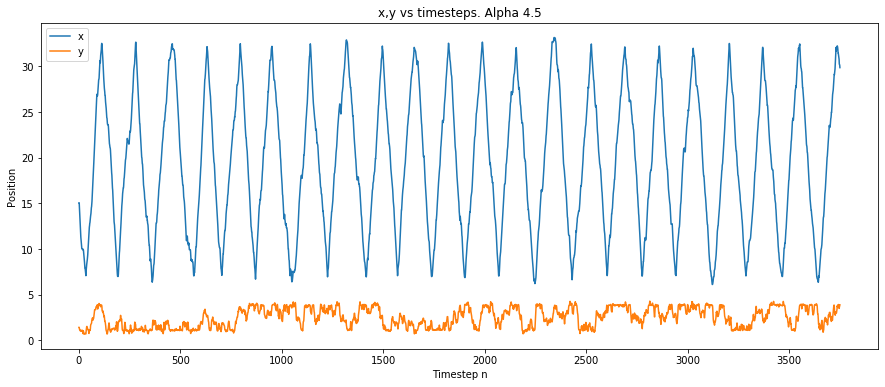

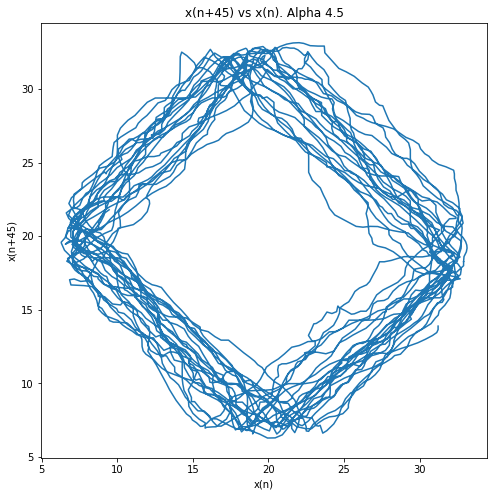

In [6]:
traj_4_5 = plot_trajectories(out_folders[0], alphas[0])

###### alpha = 3

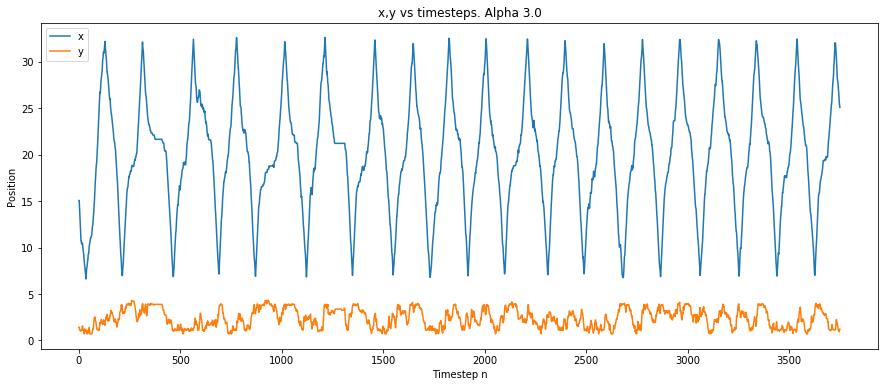

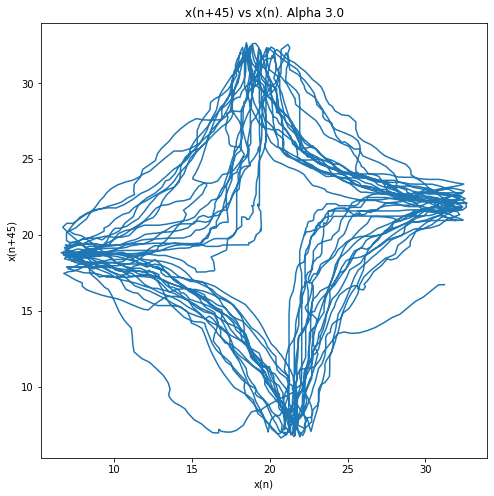

In [7]:
traj_3 = plot_trajectories(out_folders[15], alphas[15])

###### alpha = 2.6

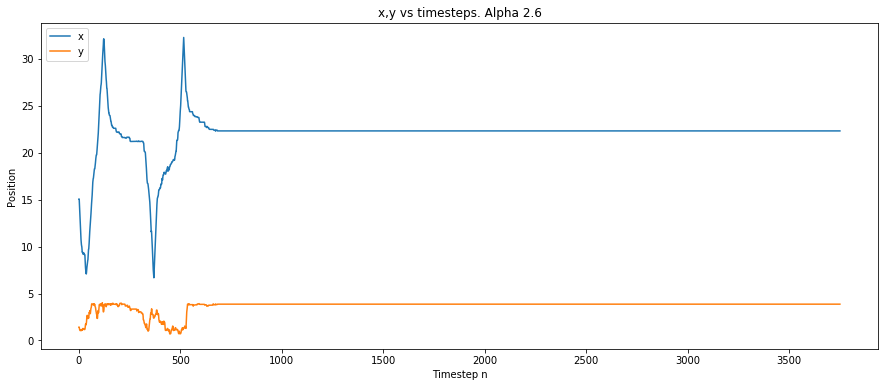

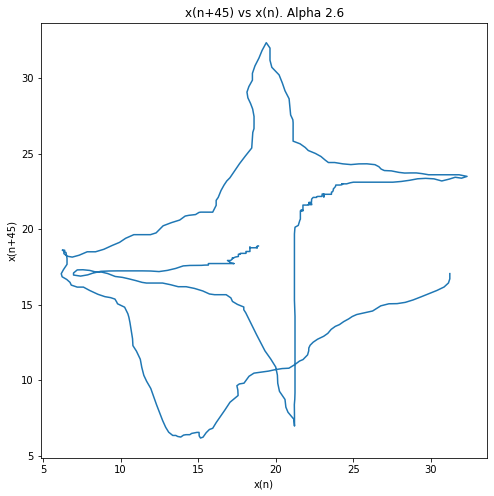

In [8]:
traj_2_6 = plot_trajectories(out_folders[19], alphas[19])

###### bifurcation occurrs at alpha = 2.6

Text(0.5, 1.0, 'Change in min/max position over alpha')

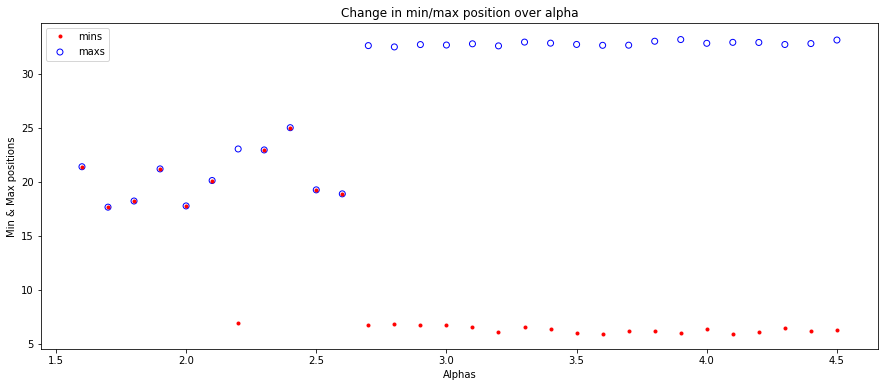

In [9]:
# get all trajectories
all_trajectories = [read_trajectories(x + "\\postvis.trajectories") for x in out_folders]
# get all minimum positions
mins = [np.min(x[id][1000:]['x-PID1']) for x in all_trajectories]
# get all maximum positions
maxs = [np.max(x[id][1000:]['x-PID1']) for x in all_trajectories]
# plot min/max per alpha
plt.figure(figsize=(15, 6))
plt.plot(alphas, mins, 'r.')
plt.scatter(alphas, maxs, facecolors='none', edgecolors='b')
plt.legend(['mins', 'maxs'], loc='upper left')
plt.xlabel("Alphas")
plt.ylabel("Min & Max positions")
plt.title("Change in min/max position over alpha")

# Part 2

In [10]:
np.arange(9.5, 11, 0.2)

array([ 9.5,  9.7,  9.9, 10.1, 10.3, 10.5, 10.7, 10.9])

In [11]:
# read scenario as JSON
scenario = read_json('scenarios/part_2.scenario')
# save output folders for each alpha
out_folders_2 = []
# alpha represents x position of the obstacle
alphas = np.arange(9.5, 11, 0.2)

for alpha in alphas:
    # update obstacle y position in scenario
    scenario['scenario']['topography']['obstacles'][2]['shape']['x'] = alpha
    # save updated scenario into file
    write_json('scenarios/part_2.scenario', scenario)
    # generate output folder name for current setup
    output_folder = "alpha_" + str(alpha)
    # run Vadere with updated scenario
    result_folder = run_simulation('scenarios\\part_2', output_folder)
    # append output to list
    out_folders_2.append(result_folder)

In [12]:
out_folders_2

['C:\\Users\\aganb\\Desktop\\MLCrowd\\HW3\\ex_5\\outputs\\alpha_9.5\\part_2_2019-11-28_04-12-34.528',
 'C:\\Users\\aganb\\Desktop\\MLCrowd\\HW3\\ex_5\\outputs\\alpha_9.7\\part_2_2019-11-28_04-15-02.925',
 'C:\\Users\\aganb\\Desktop\\MLCrowd\\HW3\\ex_5\\outputs\\alpha_9.899999999999999\\part_2_2019-11-28_04-16-57.16',
 'C:\\Users\\aganb\\Desktop\\MLCrowd\\HW3\\ex_5\\outputs\\alpha_10.099999999999998\\part_2_2019-11-28_04-19-28.465',
 'C:\\Users\\aganb\\Desktop\\MLCrowd\\HW3\\ex_5\\outputs\\alpha_10.299999999999997\\part_2_2019-11-28_04-19-33.185',
 'C:\\Users\\aganb\\Desktop\\MLCrowd\\HW3\\ex_5\\outputs\\alpha_10.499999999999996\\part_2_2019-11-28_04-19-38.161',
 'C:\\Users\\aganb\\Desktop\\MLCrowd\\HW3\\ex_5\\outputs\\alpha_10.699999999999996\\part_2_2019-11-28_04-19-43.264',
 'C:\\Users\\aganb\\Desktop\\MLCrowd\\HW3\\ex_5\\outputs\\alpha_10.899999999999995\\part_2_2019-11-28_04-19-48.171']

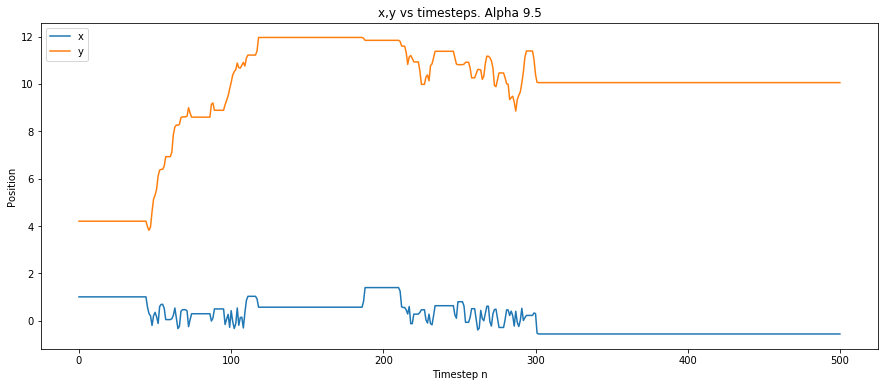

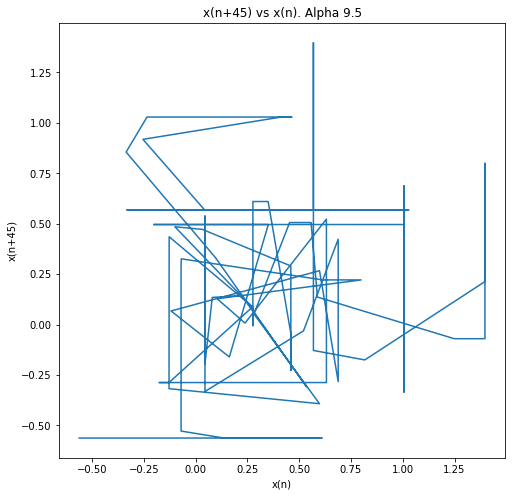

In [13]:
n = 100
id = 1
traj_10_0 = plot_trajectories(out_folders_2[0], alphas[0], 'traj')

Text(0.5, 1.0, 'Change in min/max position over alpha')

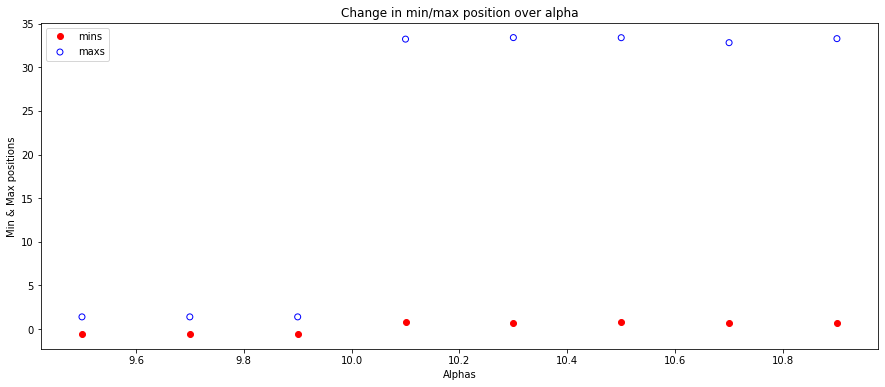

In [14]:
# get all trajectories
all_trajectories = [read_trajectories(x + "\\postvis.traj") for x in out_folders_2]
# get all minimum positions
mins = [np.min(x[id]['x-PID1']) for x in all_trajectories]
# get all maximum positions
maxs = [np.max(x[id]['x-PID1']) for x in all_trajectories]
# plot min/max per alpha
plt.figure(figsize=(15, 6))
plt.plot(alphas, mins, 'ro')
plt.scatter(alphas, maxs, facecolors='none', edgecolors='b')
plt.legend(['mins', 'maxs'], loc='upper left')
plt.xlabel("Alphas")
plt.ylabel("Min & Max positions")
plt.title("Change in min/max position over alpha")